In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
import scipy
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
data = pd.read_csv('car_prices.csv');

In [16]:
#Adjusting all the vehicles conditions rated on a scale from 1-5 to fit a scale of 10-50 so all the vehicles are rated on the same scale. 
data = data.replace(to_replace={'condition' : {1: 10, 2: 20, 3: 30, 4: 40, 5: 50}});
data = data.dropna(subset=["condition","model","odometer","saledate"]);
data.isnull().sum()

year                0
make                0
model               0
trim              278
body             2387
transmission    61713
vin                 0
state               0
condition           0
odometer            0
color             633
interior          633
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

In [17]:
data = data.drop(columns=["trim","body","transmission","vin","state","color","interior","seller","mmr","saledate"])

In [18]:
data.describe()

,year,condition,odometer,sellingprice
count,536667.000000,536667.000000,536667.000000,536667.000000
mean,2010.211755,34.337979,66453.584334,13845.216736
std,3.844865,9.464435,52270.756009,9697.947231
min,1984.000000,10.000000,1.000000,1.000000
25%,2008.000000,27.000000,27798.000000,7300.000000
50%,2012.000000,36.000000,50347.000000,12400.000000
75%,2013.000000,42.000000,96124.000000,18400.000000
max,2015.000000,50.000000,999999.000000,230000.000000


In [19]:
#Removing outliers in the sellingprice and odometer columns, removing any variables 1.5 standard deviations away from the mean
Sellstd = data["sellingprice"].std()
SellAvg = data["sellingprice"].mean()
OStd = data["odometer"].std()
OAvg = data["odometer"].mean()
data = data[((data.sellingprice > SellAvg - 1.5*Sellstd) & (data.sellingprice < SellAvg + 1.5*Sellstd) & (data.odometer > OAvg - 1.5*OStd) & (data.odometer < OAvg + 1.5*OStd))] 

In [20]:
#Combining a column that combines the make,model and year columns
data["Make&Model"] = data["make"] + " " + data["model"] + " " + data["year"].astype(str)

In [21]:
#Dropping any cars with a make,model count of less than 50
x = data["Make&Model"].value_counts()
for index,value in x.items():
    if value < 50:
        data = data.drop(data[data['Make&Model'] == index].index)
    else:
        pass

In [22]:
#Getting the average sellingprice of each car grouped by make,model and year.
cars = data.groupby(data["Make&Model"])
t = cars.mean(numeric_only=True)

In [23]:
#Creating a new column variable MakePrice, that rates a make,model,year based on its average selling price on a scale of 0-4
temp = 4
for i,j in t.iterrows():
    if j.sellingprice <= 5000:
        temp = 0
    elif j.sellingprice <= 10000:
        temp = 1
    elif j.sellingprice <= 15000:
        temp = 2
    elif j.sellingprice <= 20000:
        temp = 3
    else:
        temp = 4
    data.loc[data["Make&Model"] == i, "MakePrice"] = temp

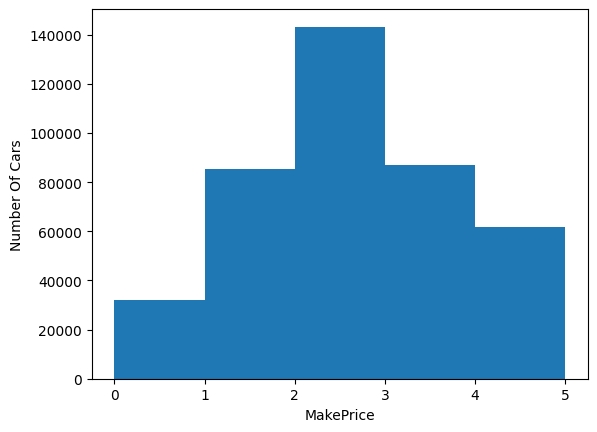

In [36]:
fig, ax = plt.subplots()
ax.set_ylabel('Number Of Cars')
ax.set_xlabel('MakePrice')
x = plt.hist(data["MakePrice"], bins=np.arange(0,6,1))

<Axes: >

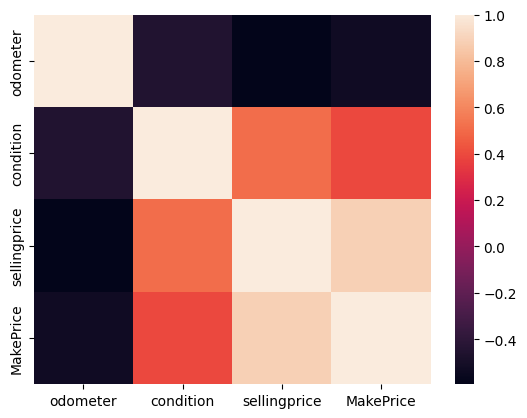

In [25]:
corr = data[["odometer","condition","sellingprice","MakePrice"]].corr()
sns.heatmap(corr)

In [26]:
X = data[["odometer","MakePrice","condition"]]
y = data[["sellingprice"]]
X_train, X_test , y_train , y_test = train_test_split(X,y, test_size = 0.20 )

In [42]:
LinReg = LinearRegression()
LinReg.fit(X_train,y_train)
print(LinReg.score(X_test,y_test))
y_pred = LinReg.predict(X_test.values)

0.823052180797208


C:\Users\ashwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
